# Multiple plots

## Review from last lecture...

In [1]:
library('tidyverse')

# This will make your plots look better in Jupyter
options(repr.plot.width=9, repr.plot.height=7) 
theme_set(theme_gray(base_size = 22))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



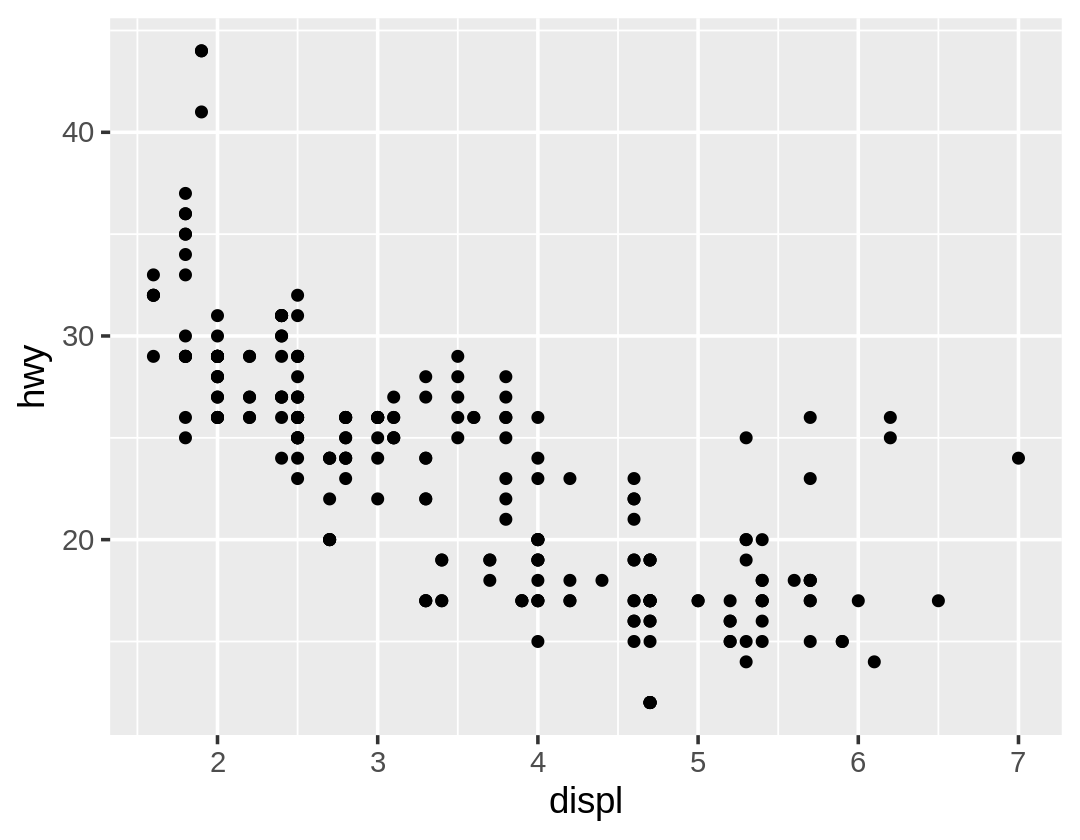

In [2]:
p = ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point(size = 3)

p

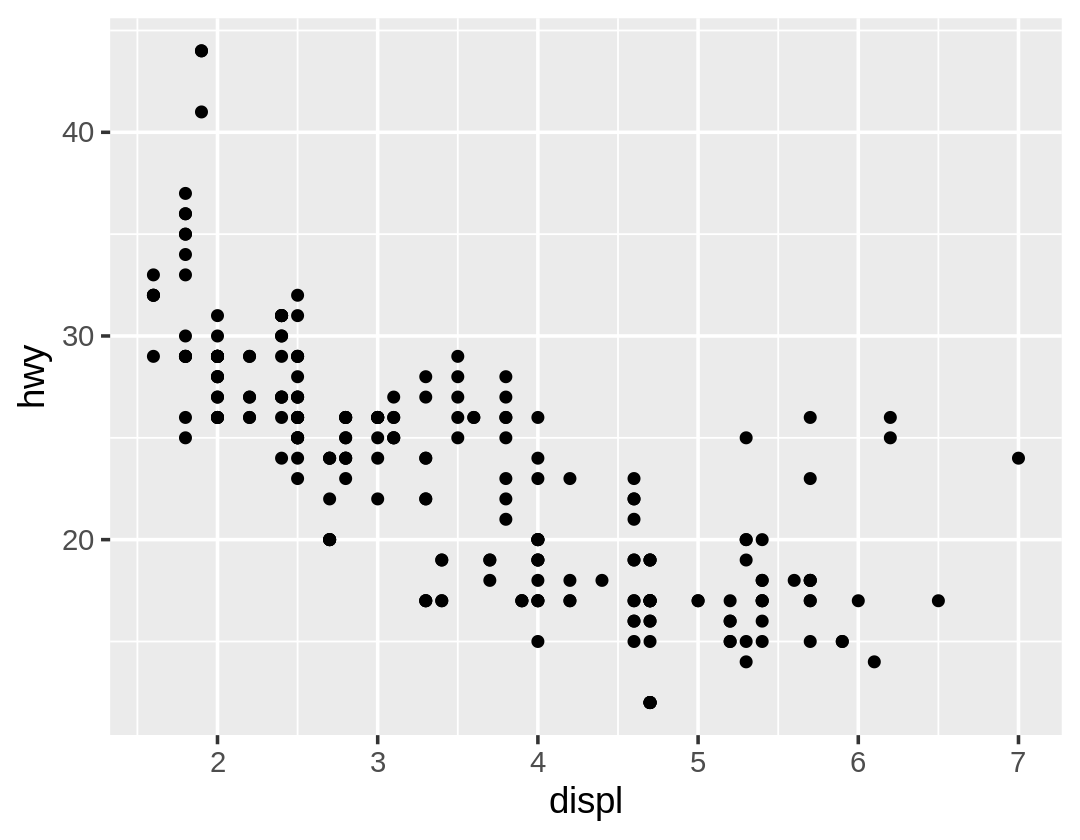

In [3]:
# alternatively add data and mapping in the geom

p = ggplot() +
    geom_point(data = mpg, size = 3, mapping = aes(x = displ, y = hwy))

p

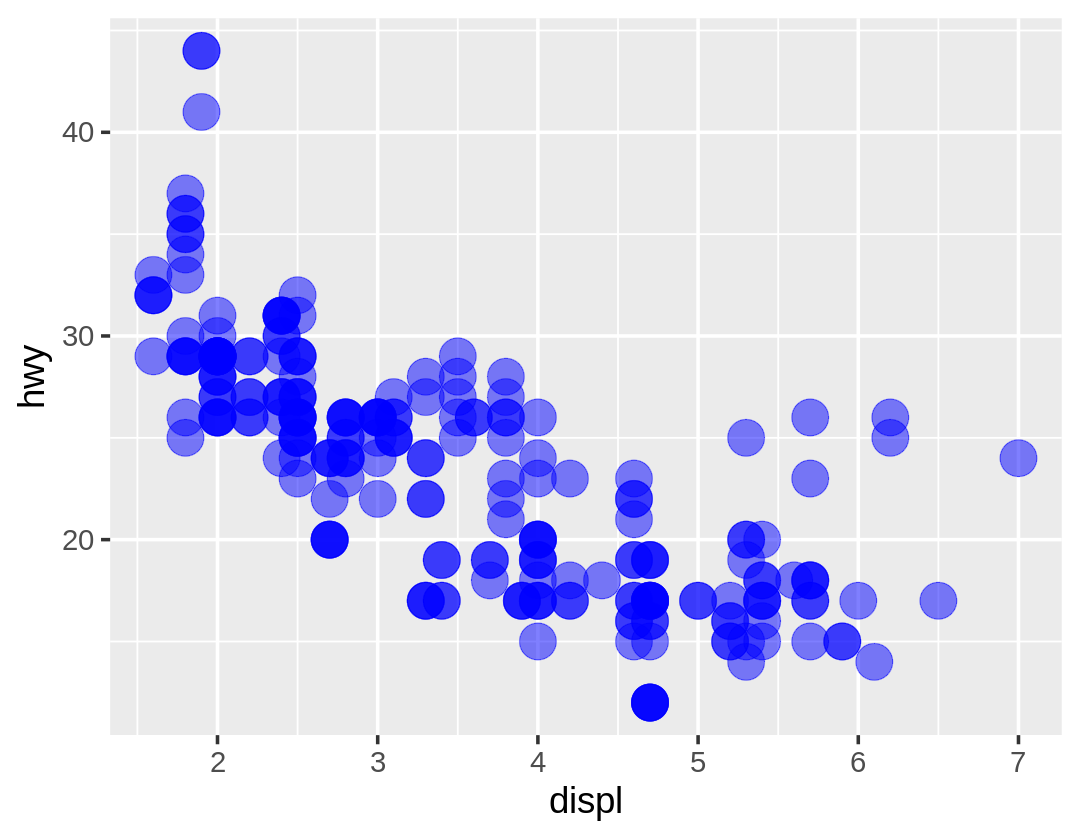

In [4]:
# How to change the color of all the points (i.e. not map them to a column in the data)?

p = ggplot(mpg, aes(x = displ, y = hwy)) +
     geom_point(color = 'blue', alpha = 0.5, size = 10)

p

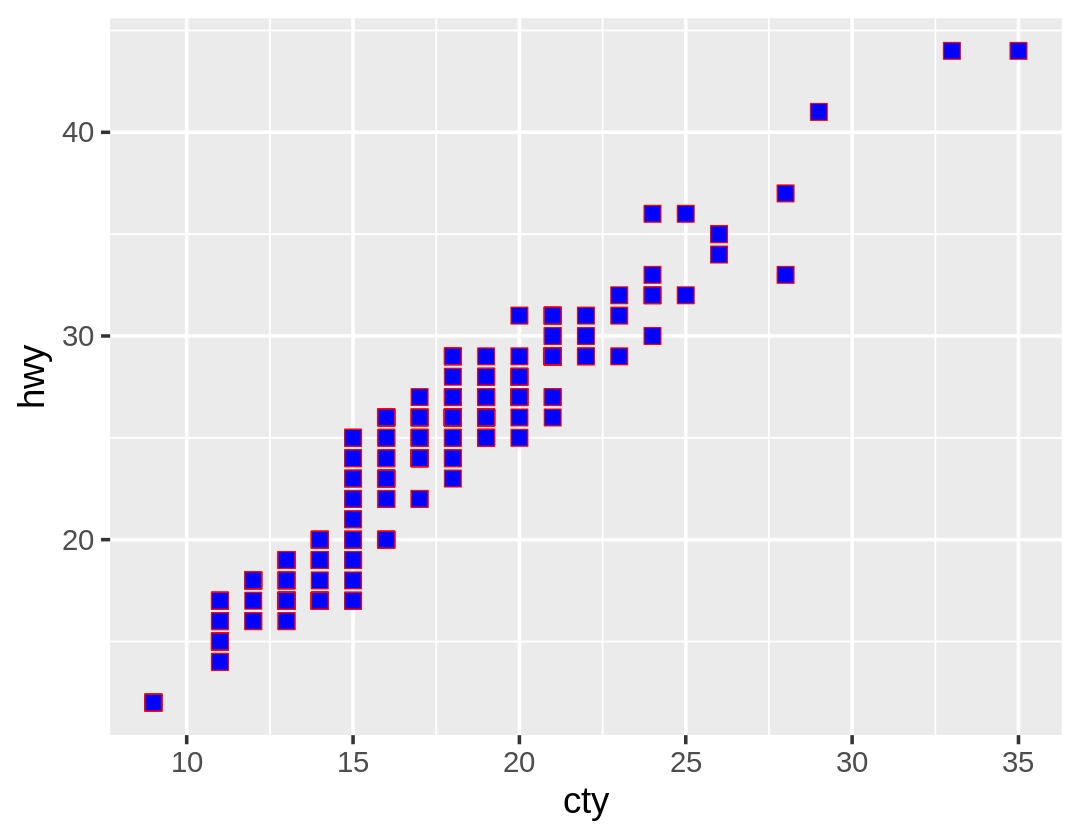

In [5]:
# What other chart properties can be "mapped?"
# X, Y, color...
# Hint: # https://r4ds.had.co.nz/data-visualisation.html#fig:shapes

p = ggplot(mpg, aes(x = cty, y = hwy)) +
    geom_point(shape = 22, size = 5, color = 'red', fill = 'blue')

p

# Facets

## facet_wrap

In [6]:
# Let's use a different data set

iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


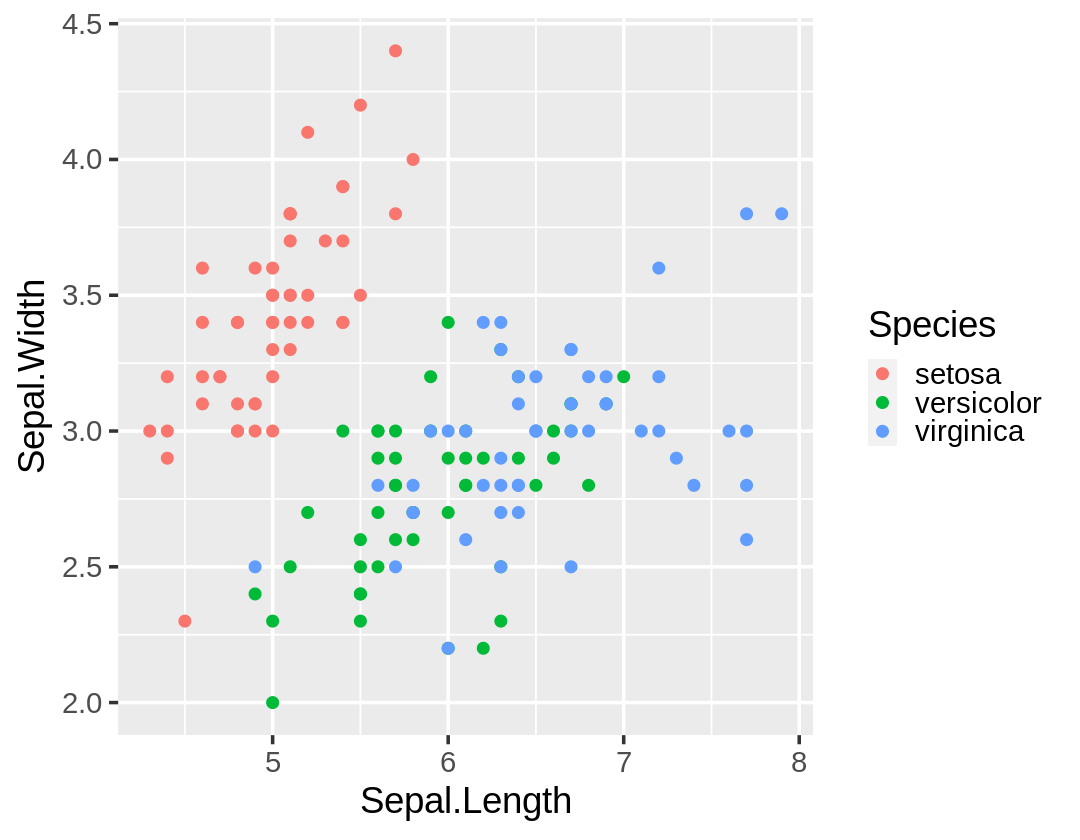

In [7]:
p = ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
    geom_point(size = 3)

p

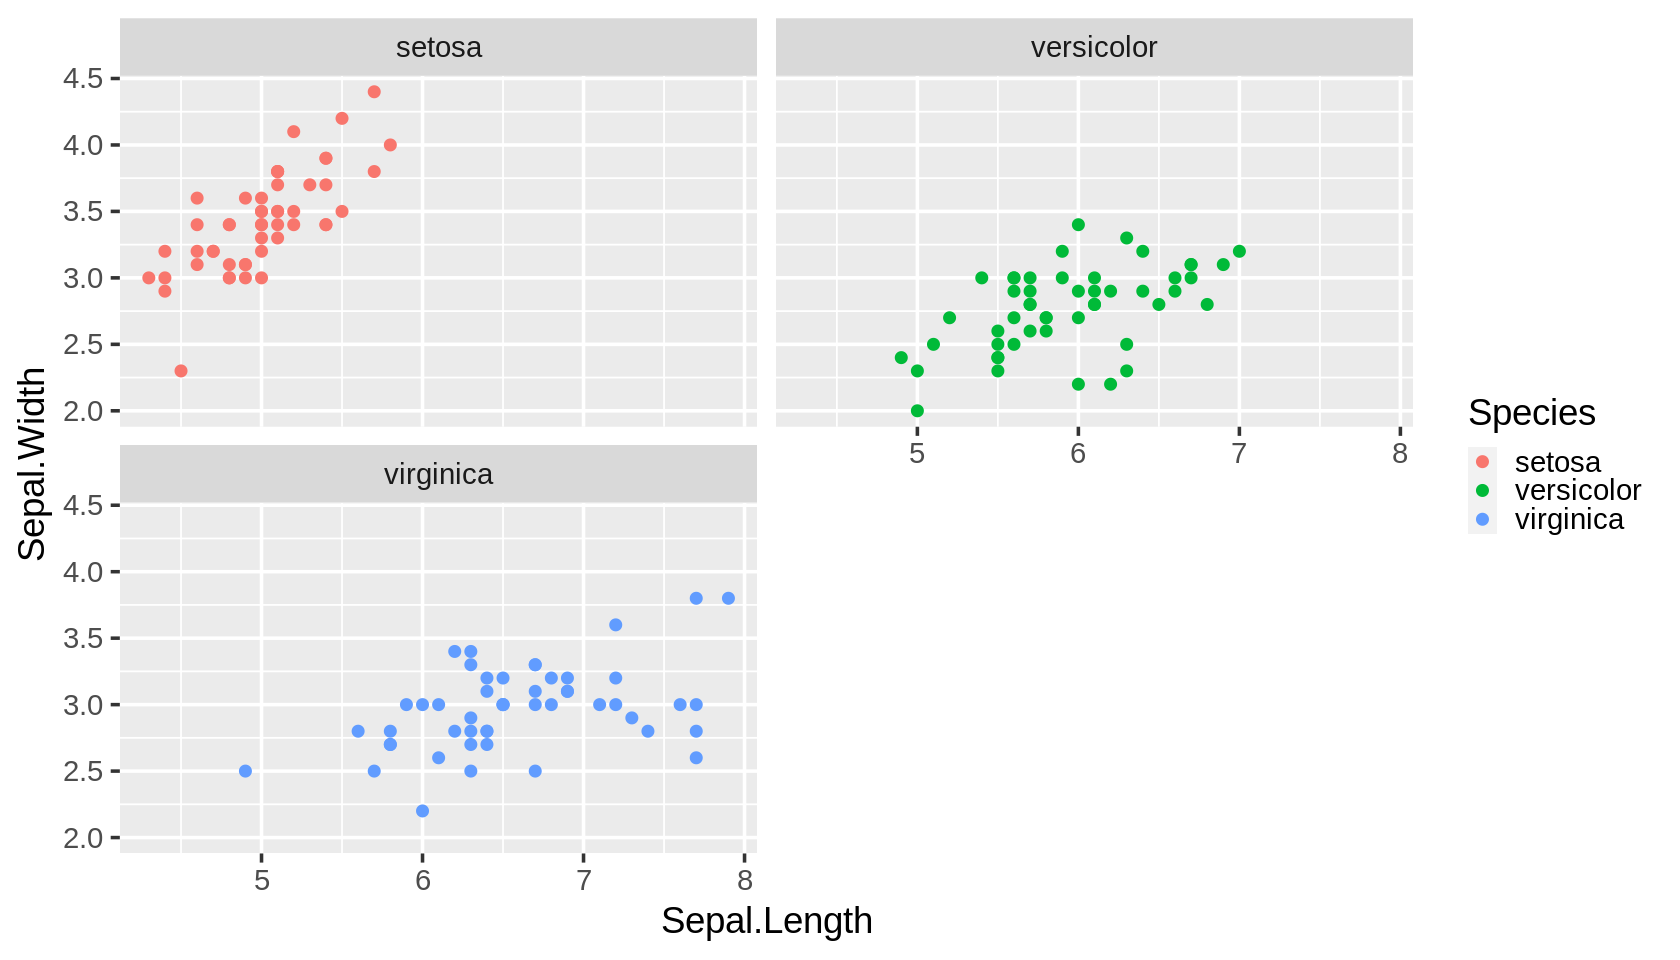

In [8]:
options(repr.plot.width = 14, repr.plot.height = 8)

p = p + facet_wrap(~ Species, nrow = 2)

p

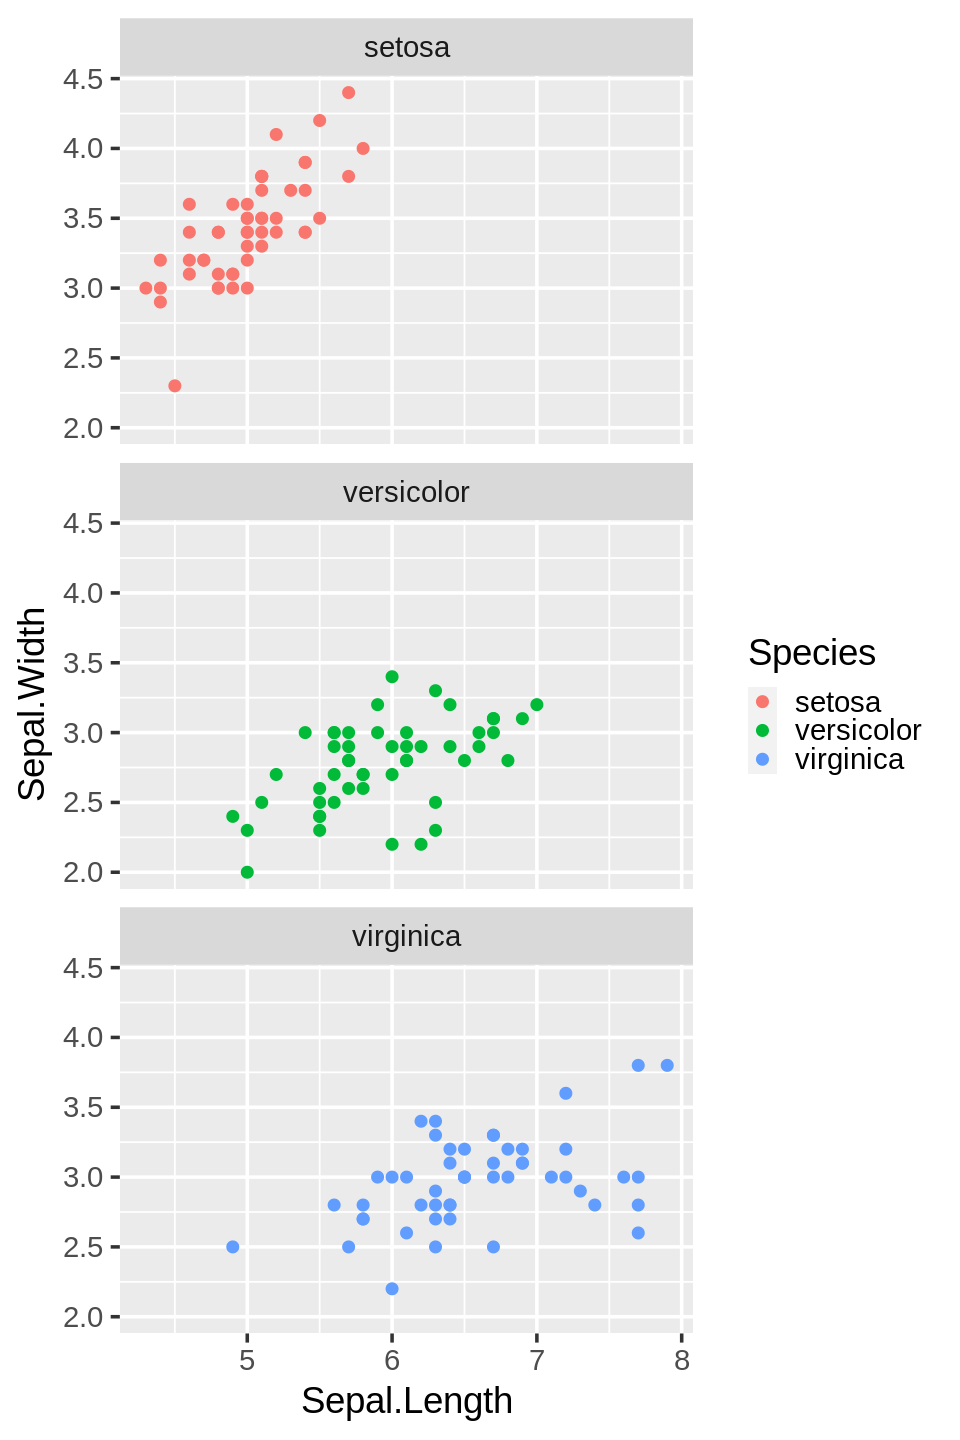

In [9]:
options(repr.plot.width=8, repr.plot.height=12)

p = p + facet_wrap(~ Species, ncol = 1)

p

## facet_grid

In [10]:
mpg %>% select(drv, cyl) %>% head

drv,cyl
<chr>,<int>
f,4
f,4
f,4
f,4
f,6
f,6


In [11]:
mpg %>% group_by(drv) %>% tally() %>% arrange(desc(n))

drv,n
<chr>,<int>
f,106
4,103
r,25


In [12]:
mpg %>% group_by(cyl) %>% tally() %>% arrange(desc(n))

cyl,n
<int>,<int>
4,81
6,79
8,70
5,4


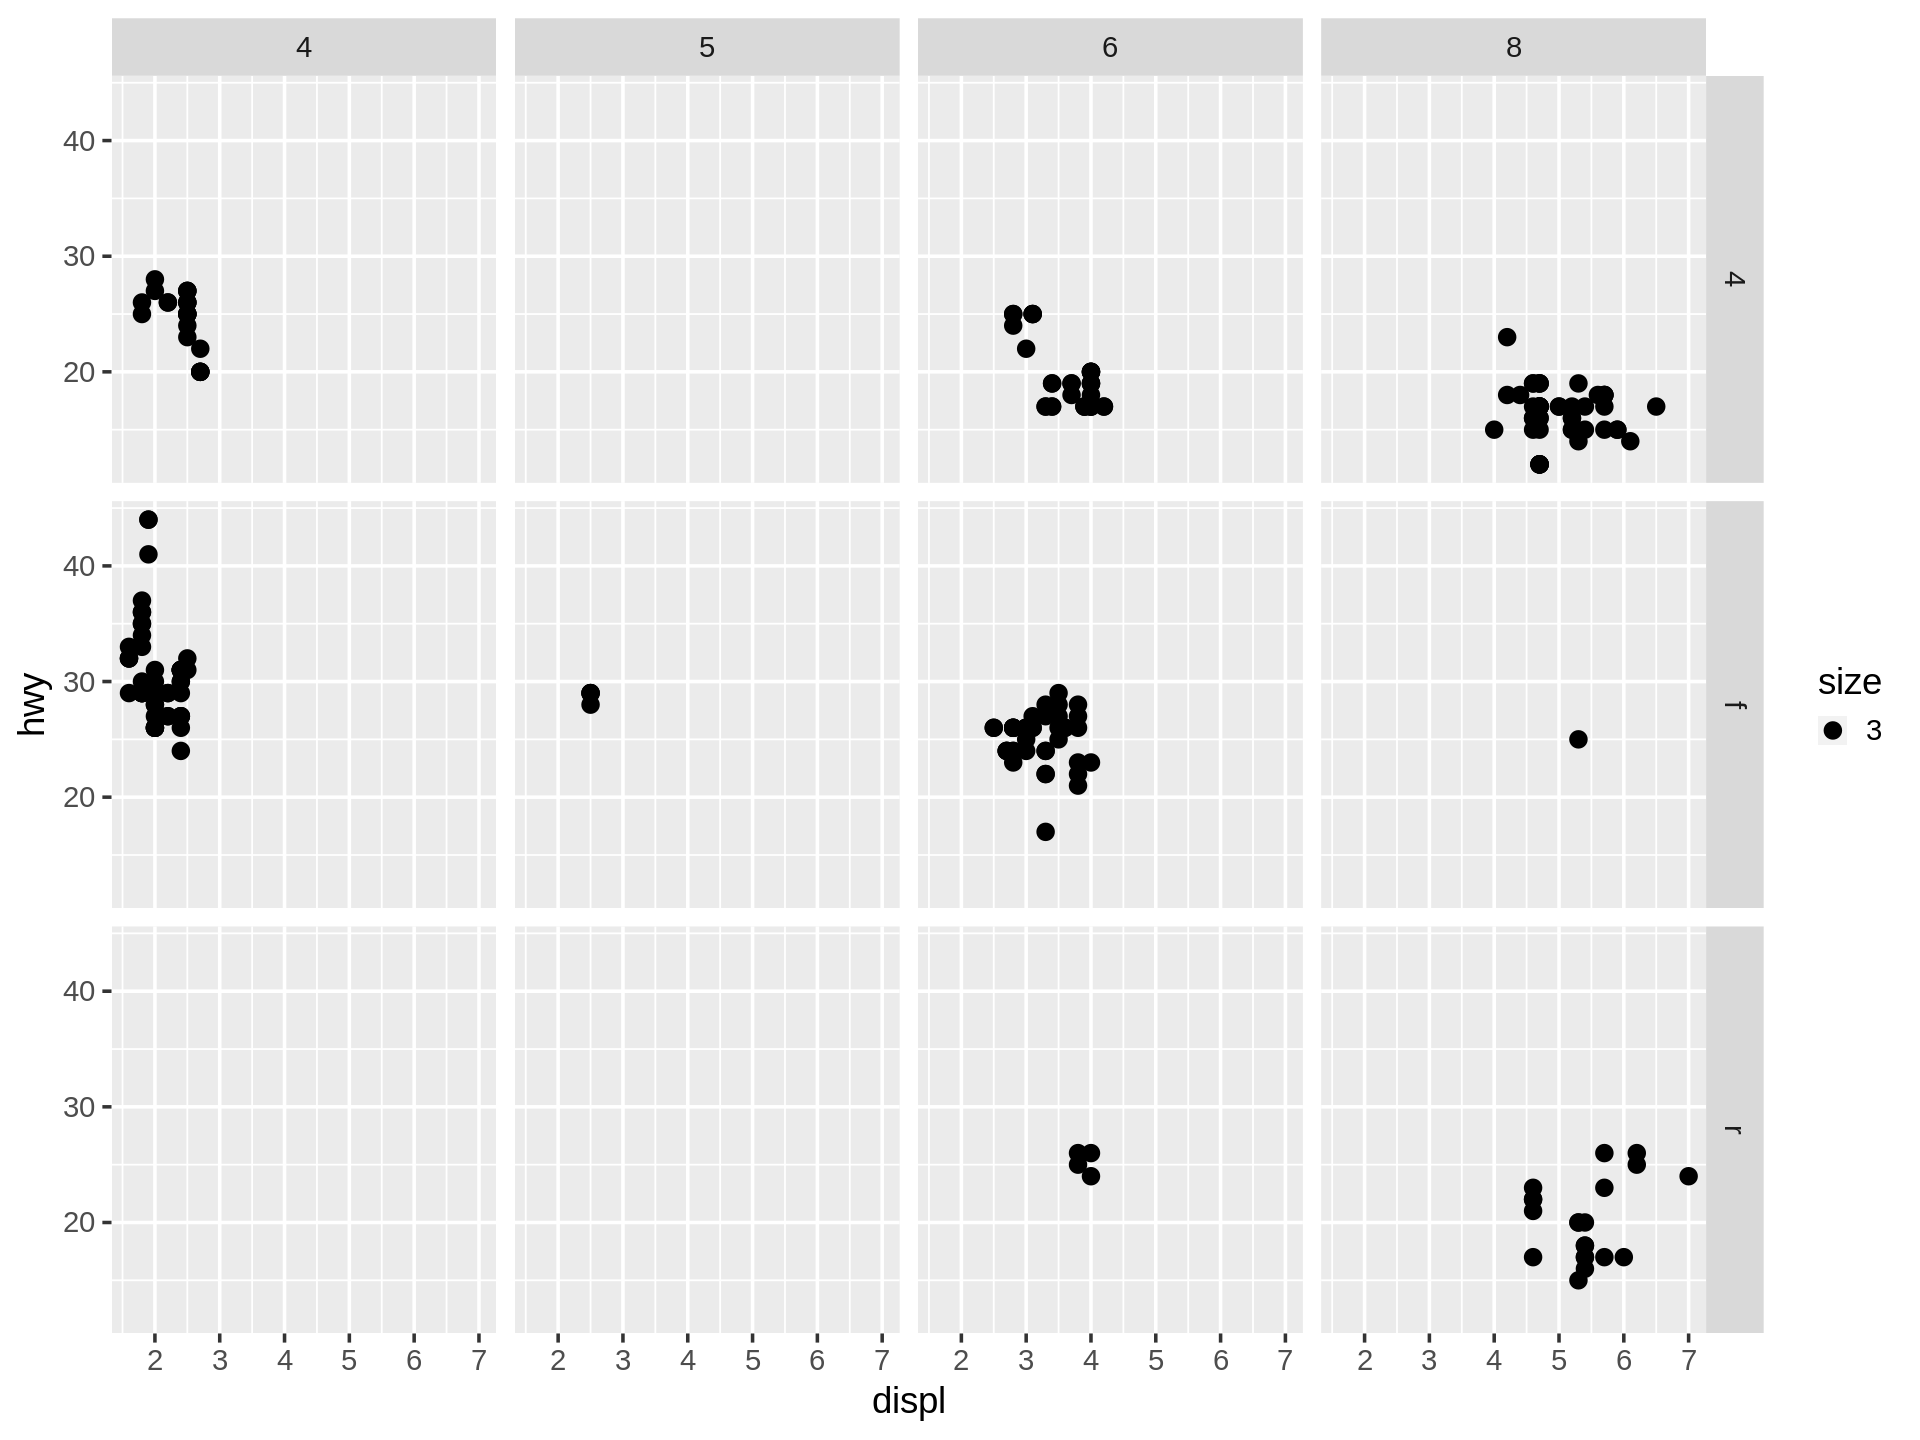

In [13]:
options(repr.plot.width=16, repr.plot.height=12)

p = ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = 3)) + 
  facet_grid(drv ~ cyl)

p

# Additional packages
E.g. [Patchwork](https://github.com/thomasp85/patchwork)

## Workflow

1. research (i.e. "google")
1. install (we'll learn this later)
1. import (`library`)
1.  use

[patchwork](https://github.com/thomasp85/patchwork)

In [14]:
library('patchwork')

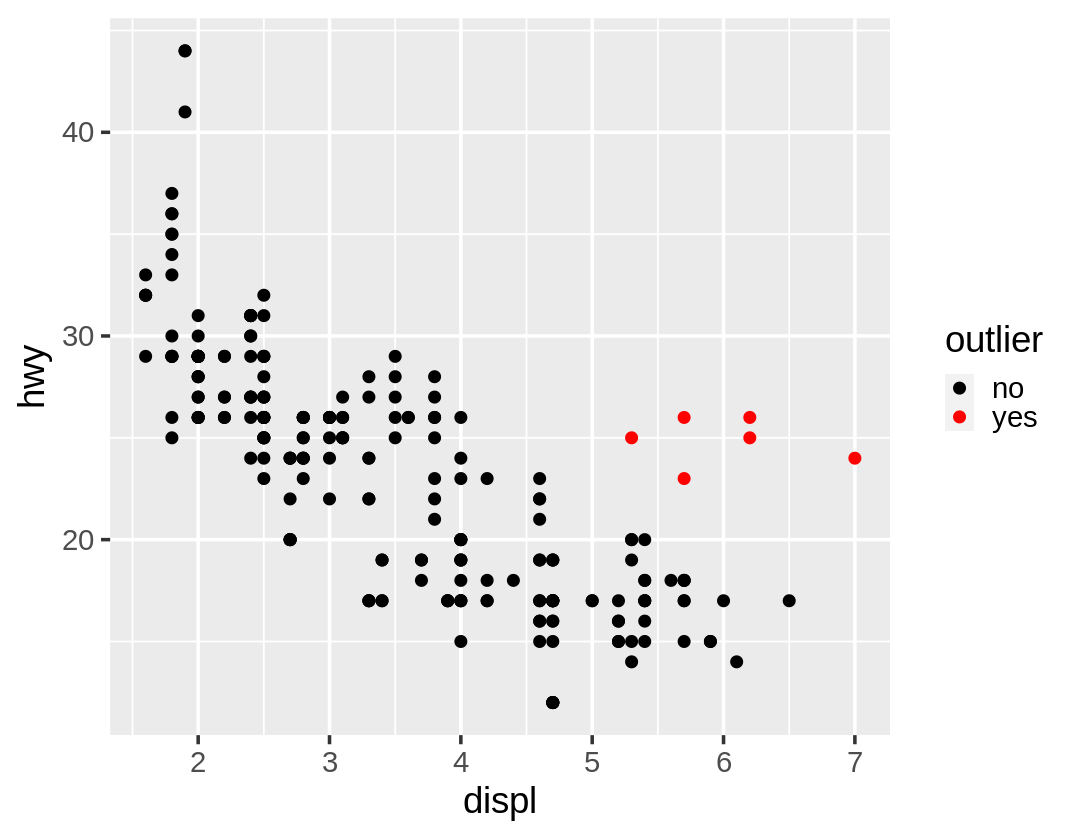

In [15]:
options(repr.plot.width=9, repr.plot.height=7)

mpg.new = mpg %>% mutate(outlier = ifelse(hwy > 20 & displ > 5, 'yes', 'no')) 

p = ggplot(mpg.new, aes(x = displ, y = hwy, color = outlier)) +
    geom_point(size = 3) +
    scale_color_manual(values=c('black', 'red'))

p

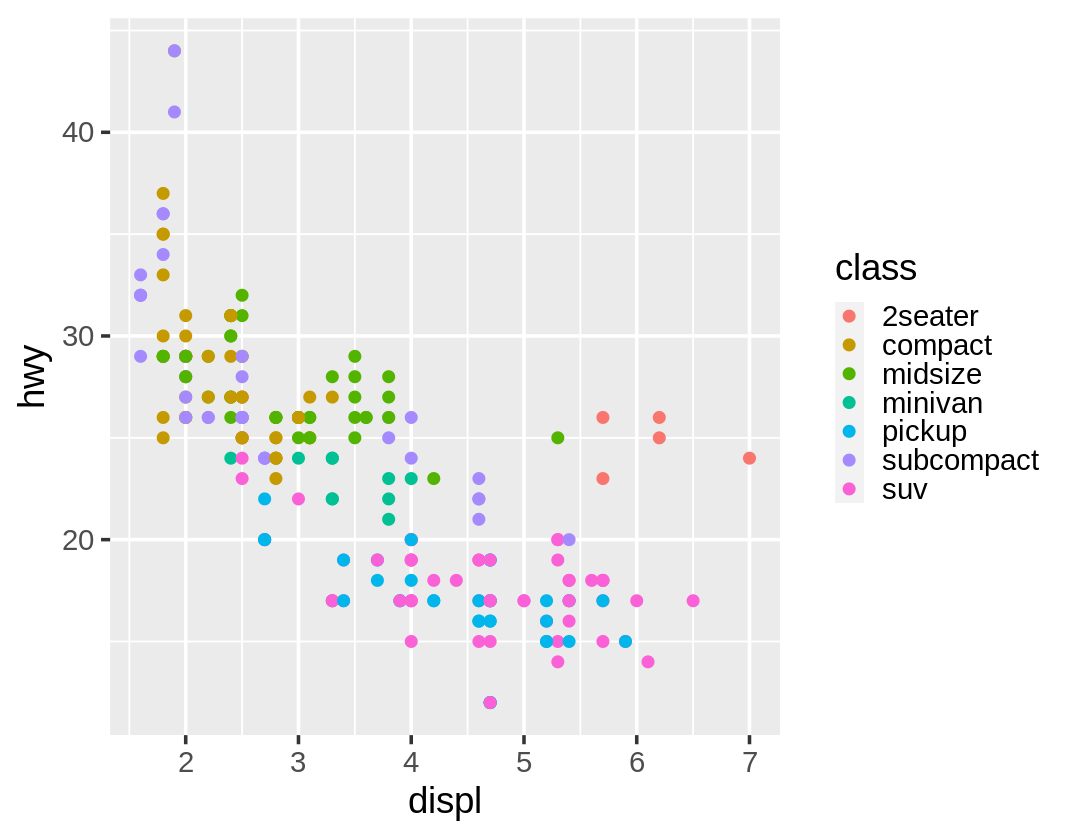

In [16]:
q = ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
    geom_point(size = 3)

q

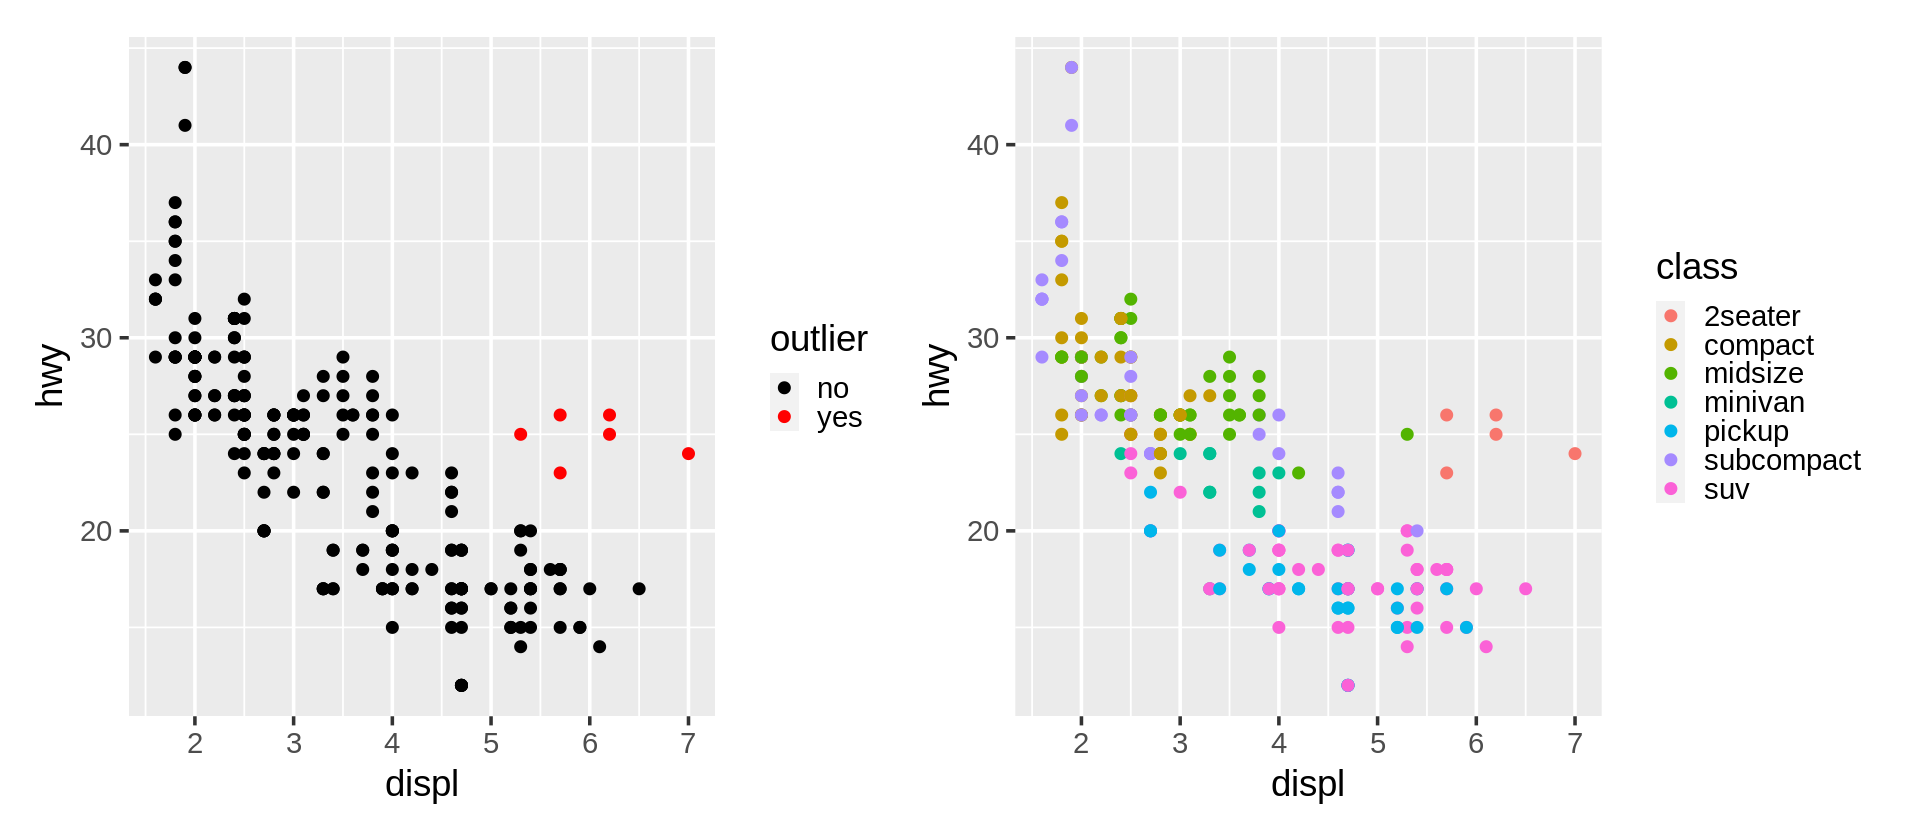

In [17]:
options(repr.plot.width=16, repr.plot.height=7)

p + q